In [7]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("RT_reviews.db")
cursor = conn.cursor()

file_path = r"C:\\Users\\Tense\\Documents\\Flatiron\\dsc-phase-2-project-v3\\zippedData\\rt.reviews.tsv.gz"
df = pd.read_csv(file_path, sep="\t", encoding="latin1")

df.to_sql('rt_reviews', conn, if_exists='replace', index=False)

query = "SELECT * FROM rt_reviews LIMIT 5" 

result = pd.read_sql_query(query, conn)




In [8]:
# Query the SQL table and display the first few rows
query = "SELECT * FROM rt_reviews LIMIT 5"
df_sql = pd.read_sql_query(query, conn)
result

id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...   None  rotten   
2   3  ... life lived in a bubble in financial dealin...   None   fresh   
3   3  Continuing along a line introduced in last yea...   None   fresh   
4   3             ... a perverse twist on neorealism...    None   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4            None           0      Cinema Scope   October 12, 2017

In [9]:
query = """
SELECT review, rating, critic, publisher
FROM rt_reviews
WHERE review IS NOT NULL
AND rating IS NOT NULL
AND critic IS NOT NULL
AND publisher IS NOT NULL
LIMIT 5
"""
df_filtered = pd.read_sql_query(query, conn)
df_filtered

review rating          critic  \
0  A distinctly gallows take on contemporary fina...    3/5      PJ Nabarro   
1  Quickly grows repetitive and tiresome, meander...      C  Eric D. Snider   
2  Cronenberg is not a director to be daunted by ...    2/5    Matt Kelemen   
3  While not one of Cronenberg's stronger films, ...     B-    Emanuel Levy   
4  Robert Pattinson works mighty hard to make Cos...    2/4  Christian Toto   

            publisher  
0     Patrick Nabarro  
1     EricDSnider.com  
2  Las Vegas CityLife  
3     EmanuelLevy.Com  
4       Big Hollywood

In [17]:
query = """
SELECT review, rating, critic
FROM rt_reviews
WHERE (review LIKE '%Guillermo del Toro%'
       OR review LIKE '%Gene Roddenberry%')
AND review IS NOT NULL
AND rating IS NOT NULL
AND critic IS NOT NULL
AND publisher IS NOT NULL
LIMIT 10
"""

df_reviews = pd.read_sql_query(query, conn)
df_reviews

review rating          critic
0  Even if you've never seen a Gene Roddenberry c...  4.5/5  John R. McEwen
1  I had high hopes for Crimson Peak, a luscious ...    1/5    Camilla Long
2  An enthusiastic celebration of gothic ghost st...    3/5    Matthew Bond
3  Not only did I love every silly, gothic, gorge...  3.5/4       Max Weiss
4  The set is spectacular, the cast is stellar, b...    3/5      Tara Brady
5  [VIDEO ESSAY] Crimson Peak" isn't an awful mov...      C    Cole Smithey
6  Guillermo del Toro's gothic horror, haunted ho...  4.5/5       Ken Hanke
7  A gorgeous, lavish Gothic thriller which is pa...   8/10      Paul Mount
8  Urgh. Another slice of over-designed pseudo-go...    1/5    Jim Schembri
9  Uneven though this horror film from Guillermo ...    3/4       John Wirt

In [20]:
# Define positive and negative criteria
positive_criteria = ['fresh', '3/5', '4/5', '5/5', '3.5/4', '4/4', '4.5/5', '8/10']
negative_criteria = ['rotten', '1/5', '2/5', '1/4', '2/4', 'C', 'D', 'F']

# Calculate positive reviews
positive_reviews = df_reviews[df_reviews['rating'].isin(positive_criteria)]
positive_count = positive_reviews.shape[0]

# Calculate negative reviews
negative_reviews = df_reviews[df_reviews['rating'].isin(negative_criteria)]
negative_count = negative_reviews.shape[0]

# Display the counts
print(f"Positive reviews count: {positive_count}")
print(f"Negative reviews count: {negative_count}")

Positive reviews count: 6
Negative reviews count: 3


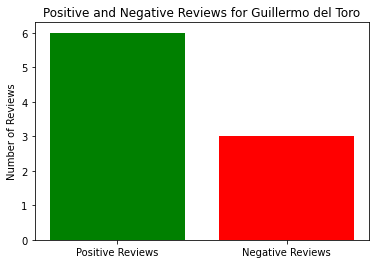

In [23]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Positive Reviews', 'Negative Reviews']
counts = [positive_count, negative_count]

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(labels, counts, color=['green', 'red'])

# Add title and labels
ax.set_title('Positive and Negative Reviews for Guillermo del Toro')
ax.set_ylabel('Number of Reviews')

# Show the plot
plt.show()

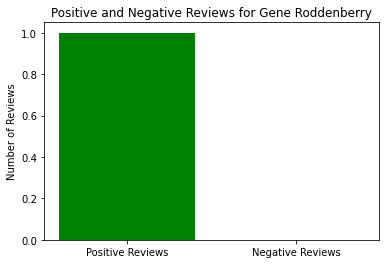

In [24]:
# Filter reviews for Gene Roddenberry
gene_reviews = df_reviews[df_reviews['review'].str.contains('Gene Roddenberry')]

# Calculate positive and negative reviews for Gene Roddenberry
positive_gene_reviews = gene_reviews[gene_reviews['rating'].isin(positive_criteria)]
negative_gene_reviews = gene_reviews[gene_reviews['rating'].isin(negative_criteria)]

positive_gene_count = positive_gene_reviews.shape[0]
negative_gene_count = negative_gene_reviews.shape[0]

# Data for plotting
labels_gene = ['Positive Reviews', 'Negative Reviews']
counts_gene = [positive_gene_count, negative_gene_count]

# Create the bar chart
fig_gene, ax_gene = plt.subplots()
ax_gene.bar(labels_gene, counts_gene, color=['green', 'red'])

# Add title and labels
ax_gene.set_title('Positive and Negative Reviews for Gene Roddenberry')
ax_gene.set_ylabel('Number of Reviews')

# Show the plot
plt.show()